In [2]:
import mediapipe as mp
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
mPose = mp.solutions.pose
pose = mPose.Pose()
mpDraw = mp.solutions.drawing_utils

In [12]:
def get_pose_path(pose):
    # get the path of on ereference image for the pose
    return "./00000122.jpg" #example output

def calculate_angle(a, b, c):
    a = np.array(a)  # First point
    b = np.array(b)  # Mid point
    c = np.array(c)  # End point
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
        
    return angle

def check_pose(landmarks, pose_name):
    # Define a dictionary to store the results
    result = {
        "is_correct": False,
        "feedback": []
    }
    
    # Extract relevant landmarks
    left_shoulder = [landmarks[mPose.PoseLandmark.LEFT_SHOULDER.value].x,
                     landmarks[mPose.PoseLandmark.LEFT_SHOULDER.value].y]
    right_shoulder = [landmarks[mPose.PoseLandmark.RIGHT_SHOULDER.value].x,
                      landmarks[mPose.PoseLandmark.RIGHT_SHOULDER.value].y]
    left_elbow = [landmarks[mPose.PoseLandmark.LEFT_ELBOW.value].x,
                  landmarks[mPose.PoseLandmark.LEFT_ELBOW.value].y]
    right_elbow = [landmarks[mPose.PoseLandmark.RIGHT_ELBOW.value].x,
                   landmarks[mPose.PoseLandmark.RIGHT_ELBOW.value].y]
    left_wrist = [landmarks[mPose.PoseLandmark.LEFT_WRIST.value].x,
                  landmarks[mPose.PoseLandmark.LEFT_WRIST.value].y]
    right_wrist = [landmarks[mPose.PoseLandmark.RIGHT_WRIST.value].x,
                   landmarks[mPose.PoseLandmark.RIGHT_WRIST.value].y]
    left_hip = [landmarks[mPose.PoseLandmark.LEFT_HIP.value].x,
                landmarks[mPose.PoseLandmark.LEFT_HIP.value].y]
    right_hip = [landmarks[mPose.PoseLandmark.RIGHT_HIP.value].x,
                 landmarks[mPose.PoseLandmark.RIGHT_HIP.value].y]
    left_knee = [landmarks[mPose.PoseLandmark.LEFT_KNEE.value].x,
                 landmarks[mPose.PoseLandmark.LEFT_KNEE.value].y]
    right_knee = [landmarks[mPose.PoseLandmark.RIGHT_KNEE.value].x,
                  landmarks[mPose.PoseLandmark.RIGHT_KNEE.value].y]
    left_ankle = [landmarks[mPose.PoseLandmark.LEFT_ANKLE.value].x,
                  landmarks[mPose.PoseLandmark.LEFT_ANKLE.value].y]
    right_ankle = [landmarks[mPose.PoseLandmark.RIGHT_ANKLE.value].x,
                   landmarks[mPose.PoseLandmark.RIGHT_ANKLE.value].y]
    
    if pose_name.lower() == "warrior":
        front_knee_angle = calculate_angle(right_hip, right_knee, right_ankle)
        if 80 <= front_knee_angle <= 120:
            result["feedback"].append("Front knee angle is correct")
        else:
            result["feedback"].append(f"Adjust front knee angle (current: {front_knee_angle:.1f}°, target: 90°)")
        
        back_leg_angle = calculate_angle(left_hip, left_knee, left_ankle)
        if 150 <= back_leg_angle <= 180:
            result["feedback"].append("Back leg is straight")
        else:
            result["feedback"].append(f"Straighten back leg (current angle: {back_leg_angle:.1f}°)")
        
        arms_angle = calculate_angle(left_wrist, left_shoulder, right_wrist)
        if 150 <= arms_angle <= 190:
            result["feedback"].append("Arms are correctly positioned")
        else:
            result["feedback"].append(f"Adjust arm position (current angle: {arms_angle:.1f}°, target: 180°)")
        
    elif pose_name.lower() == "tree":
        # Check standing leg
        standing_leg_angle = calculate_angle(right_hip, right_knee, right_ankle)
        if 170 <= standing_leg_angle <= 190:
            result["feedback"].append("Standing leg is straight")
        else:
            result["feedback"].append(f"Straighten standing leg (current angle: {standing_leg_angle:.1f}°)")
        
        # Check folded leg (approximate)
        folded_leg_angle = calculate_angle(left_hip, left_knee, left_ankle)
        if 10 <= folded_leg_angle <= 90:
            result["feedback"].append("Folded leg position is good")
        else:
            result["feedback"].append("Adjust folded leg position")
        
    elif pose_name.lower() == "goddess":
        # Check knee angles
        left_knee_angle = calculate_angle(left_hip, left_knee, left_ankle)
        right_knee_angle = calculate_angle(right_hip, right_knee, right_ankle)
        if 80 <= left_knee_angle <= 100 and 80 <= right_knee_angle <= 100:
            result["feedback"].append("Knee angles are correct")
        else:
            result["feedback"].append(f"Adjust knee angles (left: {left_knee_angle:.1f}°, right: {right_knee_angle:.1f}°, target: 90°)")
        
        # Check arm position (assuming arms are bent at elbows)
        left_arm_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
        right_arm_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)
        if 80 <= left_arm_angle <= 100 and 80 <= right_arm_angle <= 100:
            result["feedback"].append("Arm positions are correct")
        else:
            result["feedback"].append("Adjust arm positions")
        
    elif pose_name.lower() == "downdog":
        # Check arm-torso angle
        arm_torso_angle = calculate_angle(left_shoulder, left_hip, left_ankle)
        if 80 <= arm_torso_angle <= 100:
            result["feedback"].append("Arm-torso angle is correct")
        else:
            result["feedback"].append(f"Adjust arm-torso angle (current: {arm_torso_angle:.1f}°, target: 90°)")
        
        # Check leg-torso angle
        leg_torso_angle = calculate_angle(left_shoulder, left_hip, left_ankle)
        if 90 <= leg_torso_angle <= 120:
            result["feedback"].append("Leg-torso angle is good")
        else:
            result["feedback"].append(f"Adjust leg-torso angle (current: {leg_torso_angle:.1f}°, target: 90-120°)")
    
    else:
        result["feedback"].append("Unknown pose")
        return result
    
    # If we've made it this far without returning, and we have some positive feedback, consider the pose correct
    if len(result["feedback"]) > 0 and not any("Adjust" in feedback or "Unknown" in feedback for feedback in result["feedback"]):
        result["is_correct"] = True
    
    return result


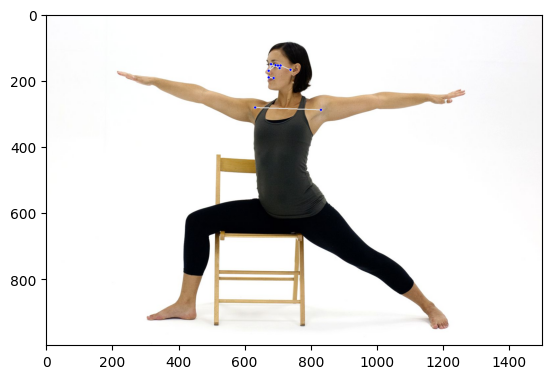

In [14]:
static_image_path = "./00000122.jpg"
image = cv2.imread(static_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pose.process(image)
if results.pose_landmarks:
    for id, lm in enumerate(results.pose_landmarks.landmark):
        h, w, c = image.shape
        cx, cy = int(lm.x*w), int(lm.y*h)
    
    mpDraw.draw_landmarks(image, results.pose_landmarks, mPose.POSE_CONNECTIONS)

    plt.imshow(image)

In [15]:
print(check_pose(results.pose_landmarks.landmark, "warrior"))

{'is_correct': True, 'feedback': ['Front knee angle is correct', 'Back leg is straight', 'Arms are correctly positioned']}


In [16]:
def video_recognition(pose_name):
    pose_path = get_pose_path(pose) # this function should return the path of the reference image for the pose
    cap = cv2.VideoCapture(0)
    window_name = "window"
    cv2.namedWindow(window_name, cv2.WND_PROP_FULLSCREEN)
    cv2.setWindowProperty(window_name, cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # frame_rgb = cv2.flip(frame_rgb,1)

        
        results = pose.process(frame_rgb)
        if results.pose_landmarks:
            landmarks = results.pose_landmarks.landmark
            pose_check_result = check_pose(landmarks, pose_name)
            outline_color = (0, 255, 0) if pose_check_result["is_correct"] else (0, 0, 255)
            custom_connections = mpDraw.DrawingSpec(color=outline_color, thickness=2)
            custom_landmarks = mpDraw.DrawingSpec(color=outline_color, circle_radius=2)

            mpDraw.draw_landmarks(
                frame, 
                results.pose_landmarks, 
                mPose.POSE_CONNECTIONS,
                landmark_drawing_spec=custom_landmarks,
                connection_drawing_spec=custom_connections
            )

            y0, dy = 50, 30
            for i, feedback in enumerate(pose_check_result["feedback"]):
                y = y0 + i * dy
                cv2.putText(frame, feedback, (50, y), cv2.FONT_HERSHEY_SIMPLEX, 1, outline_color, 2)


        # adding the reference image
        image = cv2.imread(pose_path)
        image = cv2.resize(image, (frame.shape[1], frame.shape[0]))
        result = cv2.addWeighted(frame, 0.7, image, 0.5, 0)

        cv2.imshow(window_name, result)
        if cv2.waitKey(1) == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [17]:
video_recognition("warrior")